<a href="https://colab.research.google.com/github/Poorani23/SyncTech_Innovation_Data_Analysis/blob/main/Cleaning_Data(Dataset_1)(Level_1(P3)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
file_path = '/content/AB_NYC_2019.csv'
data = pd.read_csv(file_path)

In [ ]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149        

In [ ]:
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.

In [ ]:
print("\nData information:")
print(data.info())


Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review  

In [ ]:
print("\nChecking for missing values:")
print(data.isnull().sum())


Checking for missing values:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [ ]:
for column in data.columns:
    if data[column].isnull().sum() > 0:
        if data[column].dtype == 'object':
            data[column].fillna(data[column].mode()[0], inplace=True)
        else:
            data[column].fillna(data[column].mean(), inplace=True)

In [ ]:
print("\nMissing values after handling:")
print(data.isnull().sum())


Missing values after handling:
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [ ]:
print("\nChecking for duplicate records:")
duplicates = data.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")


Checking for duplicate records:
Number of duplicate records: 0


In [ ]:
data.drop_duplicates(inplace=True)
print(f"Number of records after dropping duplicates: {len(data)}")

Number of records after dropping duplicates: 48895


In [ ]:
numerical_features = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [ ]:
print("\nData after standardization (first few rows):")
print(data.head())


Data after standardization (first few rows):
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type     price  minimum_nights  number_of_reviews last_review  \
0     Private r

In [ ]:
from scipy.stats import zscore

In [ ]:
z_scores = np.abs(zscore(data[numerical_features]))
print("\nZ-scores (first few rows):")
print(z_scores[:5])


Z-scores (first few rows):
      price  minimum_nights  number_of_reviews  reviews_per_month  \
0  0.015493        0.293996           0.320414       7.766410e-01   
1  0.300974        0.293996           0.487665       6.631381e-01   
2  0.011329        0.196484           0.522433       2.790146e-17   
3  0.265335        0.293996           5.538156       2.181110e+00   
4  0.302811        0.144807           0.320414       8.500840e-01   

   calculated_host_listings_count  availability_365  
0                        0.034716          1.916250  
1                        0.156104          1.840275  
2                        0.186451          1.916250  
3                        0.186451          0.617065  
4                        0.186451          0.856865  


In [ ]:
threshold = 3
outliers = np.where(z_scores > threshold)

print(f"\nOutliers detected (z-score > {threshold}):")
print(outliers)


Outliers detected (z-score > 3):
(array([    3,     7,     9, ..., 48725, 48726, 48727]), array([2, 2, 2, ..., 4, 4, 4]))


In [ ]:
data_clean = data[(z_scores < threshold).all(axis=1)]
print(f"\nData shape after removing outliers: {data_clean.shape}")


Data shape after removing outliers: (45632, 16)


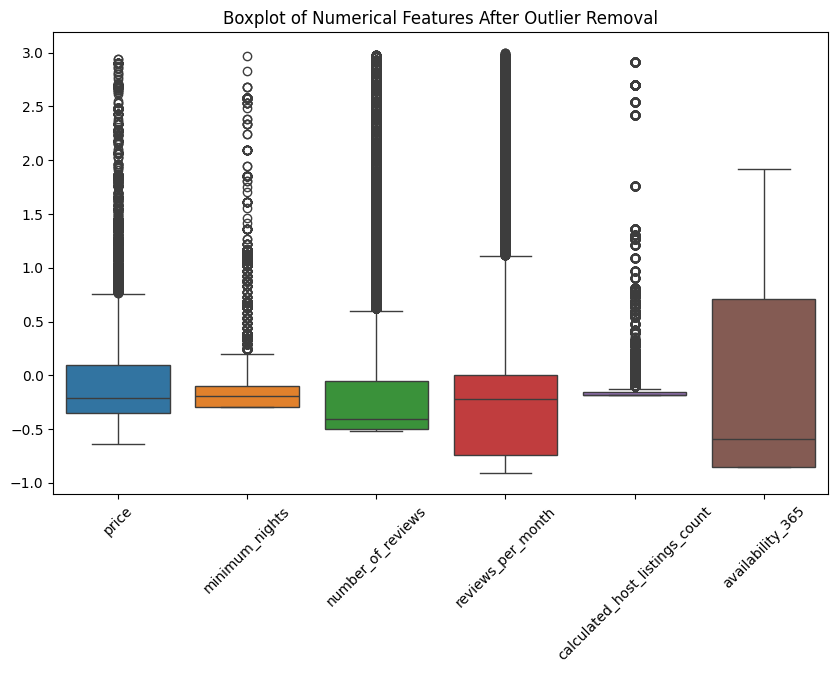

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_clean[numerical_features])
plt.title('Boxplot of Numerical Features After Outlier Removal')
plt.xticks(rotation=45)
plt.show()

In [ ]:
data_clean.to_csv('/content/AB_NYC_2019_clean.csv', index=False)

In [ ]:
print("Data cleaning complete. Cleaned data saved to 'AB_NYC_2019_clean.csv'.")

Data cleaning complete. Cleaned data saved to 'AB_NYC_2019_clean.csv'.
